In [1]:
import torch
import torch.nn.functional as F

In [2]:
torch.manual_seed(1)

#1. 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)

In [3]:
z = torch.FloatTensor([1,2,3])

In [4]:
hypothesis = F.softmax(z, dim = 0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [5]:
hypothesis.sum()

tensor(1.)

In [6]:
z = torch.rand(3,5, requires_grad = True)

In [7]:
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [8]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([0, 2, 1])


In [9]:
y_one_hot = torch.zeros_like(hypothesis)    #모든 원소가 0의 값을 가진 3x5 텐서
y_one_hot.scatter_(1, y.unsqueeze(1),1)     #y.unsqueeze(1)를 하면 (3,)의 크기를 가졌던 y가 (3x1)텐서가 된다.
#scatter의 첫번째 인자 dim = 1 / 세번째 인자 2번째 인자인 y_unsqeeze(1)이 알려주는 위치에 숫자 1을 넣음

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

소프트맥스 회귀의 비용 함수는 다음과 같다.  
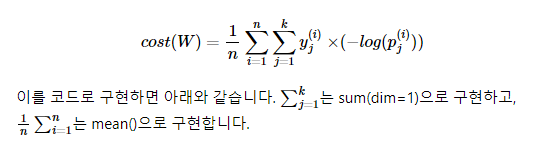

In [10]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


#2. 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

##1. F.softmax() + torch.log() = F.log_softmax()

In [11]:
#Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [13]:
#High level
F.log_softmax(z,dim = 1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

##2. F.log_softmax() + F.nll_loss() = F.cross_entropy()

In [14]:
#Low level
#첫번째 수식
(y_one_hot * -torch.log(F.softmax(z,dim = 1))).sum(dim = 1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [15]:
#두번째 수식
(y_one_hot * -F.log_softmax(z,dim = 1)).sum(dim = 1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [19]:
#High level
#세번째 수식
F.nll_loss(F.log_softmax(z,dim=1),y)
#nll -> Negative log Likehood
#원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [20]:
#네번째 수식
F.cross_entropy(z,y)

tensor(1.4689, grad_fn=<NllLossBackward0>)